# klassifiering

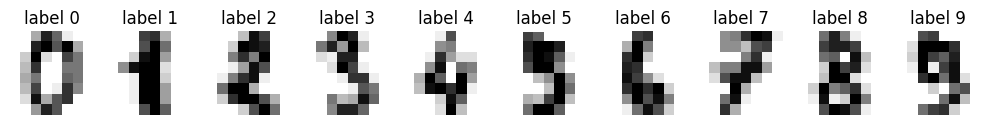

In [23]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('label %i' % label)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

In [25]:
len(digits.images)

1797

In [26]:
X_digits, y_digits = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.5, random_state=42)

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
log = LogisticRegression(max_iter=10000)


# här behövs ingen skalering eller normalisering eftersom, värderna är pixlar och ligger mellan 0 och 16(eller 0-255)
knn.fit(X_train, y_train)
log.fit(X_train, y_train)

y_knn = knn.predict(X_test)
y_log = log.predict(X_test)

print(classification_report(y_test, y_knn))
print(classification_report(y_test, y_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.99      1.00      0.99        89
           2       0.99      1.00      0.99        83
           3       0.99      0.96      0.97        93
           4       0.99      1.00      0.99        93
           5       0.99      0.98      0.98        99
           6       1.00      1.00      1.00        98
           7       0.97      1.00      0.98        87
           8       0.98      0.98      0.98        83
           9       0.98      0.96      0.97        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        82
           1       0.95      0.93      0.94        89
           2       0.94      1.00      0.97        83
           3       0.99 

- precision betyder hur många av de som klassificerades som en viss klass som verkligen var den klassen
 - recall betyder hur många av de som var av en viss klass som klassificerades som den klassen
 - f1-score är en kombination av precision och recall
 - support är antalet exempel i varje
 - accuracy är hur många av de som klassificerades som rätt , kan ses som MSE för klassificering
 - macro avg är medelvärdet av precision, recall och f1-score för alla klasser
 - weighted avg är medelvärdet av precision, recall och f1-score

 KNN har bättre precision och recall

 KNN är en av de mest effektiva algoritmerna som finns, men om vi ökar dimensionerna så kommer den att bli långsam
 varje punkt blir isolerad och det blir svårt att hitta närmaste punkter
 logistisk regression är en linjär modell och fungerar bättre i högre dimension
 den är också
 bättre på att hantera outliers

 det finns ett avsnitt i boken varför l1normen tenderar
 det finns ett avsnitt i boken varför l1normen tenderar att sätta vissa värden till 0, vilket kan vara bra för att förstå vad som händer i modellen

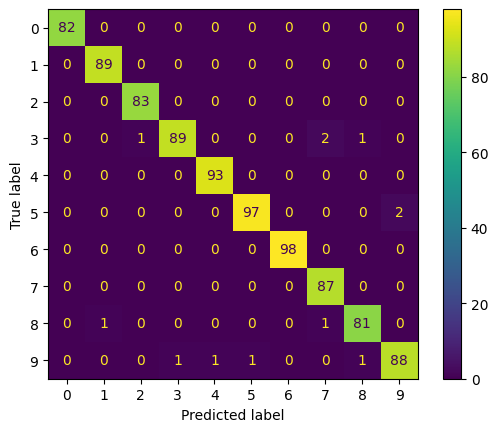

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm =  confusion_matrix(y_test, y_knn)
ConfusionMatrixDisplay(cm).plot()

[Text(0.5, 1.0, 'elbow'), Text(0.5, 0, 'k'), Text(0, 0.5, 'error')]

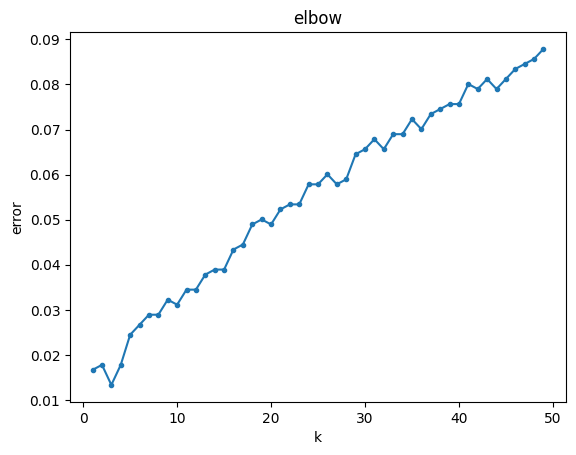

In [29]:
from sklearn.metrics import accuracy_score

error = 1 - accuracy_score(y_test, y_knn)
error_list = []

for k in range(1,50):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_hat = model_knn.predict(X_test)
    error_list += [1-accuracy_score(y_test, y_hat)]

fig, ax = plt.figure, plt.axes()
ax.plot(range(1,len(error_list)+1), error_list, ".-")
ax.set(title="elbow", xlabel="k", ylabel="error")


In [ ]:
# här kan vi se att k=3 är det bästa valet för k
# skulle vi istället ha bokstäver istället för siffror hade dimensionaliteten varit mycket större och en KNN hade inte varit lika bra
